 **Classification on MNIST using a Neural Network**

In [ ]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


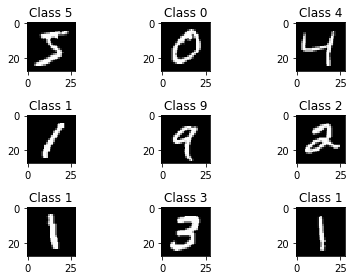

In [ ]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", Y_train.shape)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[i]))

plt.tight_layout()  #making sure that the spacing between the plots is proper

In [ ]:
print(X_train[2])
print("Shape: " + str(X_train[2].shape))  #printing the value of single x train value and its shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

**Preparing the data for classification**

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)   #reshaping 28*28 images into 784 dimensional vector

In [ ]:
 #normalizing the pixel values to be from [0->1] instead of [0->255]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# using one hot encoding to set output in an array format
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes) 

**Building and compiling the Neural Network model**

In [ ]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(512, input_shape=(784,)),
                              tf.keras.layers.Activation('relu'),
                              #tf.keras.layers.Dense(512, activation='relu'),
                              #tf.keras.layers.Dense(512,activation='relu'),
                              #tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Activation('softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5, verbose=1,
          validation_split=0.4)

Epoch 1/5
282/282 [==============================] - 5s 15ms/step - loss: 0.3288 - accuracy: 0.9081 - val_loss: 0.1868 - val_accuracy: 0.9456
Epoch 2/5
282/282 [==============================] - 3s 12ms/step - loss: 0.1417 - accuracy: 0.9588 - val_loss: 0.1418 - val_accuracy: 0.9595
Epoch 3/5
282/282 [==============================] - 4s 13ms/step - loss: 0.0929 - accuracy: 0.9731 - val_loss: 0.1108 - val_accuracy: 0.9675
Epoch 4/5
282/282 [==============================] - 3s 12ms/step - loss: 0.0646 - accuracy: 0.9821 - val_loss: 0.1011 - val_accuracy: 0.9696
Epoch 5/5
282/282 [==============================] - 4s 13ms/step - loss: 0.0477 - accuracy: 0.9870 - val_loss: 0.0959 - val_accuracy: 0.9717


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1])

[0.08362084627151489, 0.9754999876022339]
Test score: 0.08362084627151489
Test accuracy: 0.9754999876022339


**Classifying Movie Reviews**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=15000)

In [ ]:
train_data[0]

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
decoded_review

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=15000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_split=0.2)
results = model.evaluate(x_test, y_test)


Epoch 1/4
40/40 [==============================] - 3s 56ms/step - loss: 0.4809 - accuracy: 0.8151 - val_loss: 0.3715 - val_accuracy: 0.8764
Epoch 2/4
40/40 [==============================] - 2s 50ms/step - loss: 0.2987 - accuracy: 0.9069 - val_loss: 0.3265 - val_accuracy: 0.8732
Epoch 3/4
40/40 [==============================] - 2s 46ms/step - loss: 0.2279 - accuracy: 0.9310 - val_loss: 0.2797 - val_accuracy: 0.8902
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2864 - accuracy: 0.8866


In [9]:
print('test accuracy:',results[1])

test accuracy: 0.8866000175476074
